# Capstone Project

## Phase 1

Data Collection/preparation part.



Note: You can collect data from anywhere (wiki, google, etc) but mention the link from where data is being collected.

You can collect the data manually. It's NOT a web scraping task.

Data should be collected for the years mentioned in the files. (If you don't find proper data, make your best judgment and fill it, It's absolutely OK. Do not worry about data accuracy.)


1) Data
2) The population of each state.
3) Literacy Rate in each state
4)Area of each state
Collect any other data that helps with your analysis. There is no limitation for anything.

Create a new file and keep the above-collected data.




## Phase 2



State/UT wise analysis.



Note :

You need to be careful as this phase is whole state/UT wise analysis (not district-wise).

It is up to you which columns you want to keep or delete to make proper analysis"

##### 2.1	Analysis of Literacy Rate vs Total Crimes.

##### 2.2	Analysis of the type of crime vs each state vs Literacy rate.

##### 2.3	Analysis of year-on-year total crime rate.

##### 2.4	Analysis of area vs overall crime.

##### 2.5	Analysis of Population vs overall Crime.

##### 2.6	Each state crime report. There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.





## Phase 3

SQL Operations

Note: Create a separate table for each file and give a meaningful name.



When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.



##### 3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table.



##### 3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year.



##### 3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year.



##### 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table



##### 3.5	Write SQL query to find the highest number of dacoity/robbery in which district.



##### 3.6	Write SQL query to find in which districts(All) the lowest number of murders happened.



##### 3.7	Write SQL query to find the number of murders in ascending order in district and year wise.



##### 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table.



##### 3.8.2	Write SQL query to find which District in each state/UT has the highest number of murders year wise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.



##### 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order.



##### 3.8.4	Use appropriate graphs to show your data (the result of 3.8.3).


## Phase 4



Unsupervised ML (Clustering)



Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.



Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.



##### 4.1  "Create 3 clusters as below.

1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"



##### 4.2  Create DataFrame for each cluster that shows data according to the areas.



##### 4.3  "Analyze your clusters and prepare a report that explains all your observations.



Example - 

1. What is impacting more crimes in sensitive areas. 

2. What needs to be done to reduce crime. 

3. Most safe and unsafe districts.

4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"



###### 4.4   Capstone project overall story in your own words. Min 1000 words.


------------------------------------------------------------------------------------------------------------------------------

In [9]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import warnings
warnings.filterwarnings('ignore')

# Phase 1

In [3]:
#Collecting data of statewise population

#### Population(req 1): 
Data for the years 2002- 2012 was hard to come by or irregular so we checked the yearly population change rate which were as follows, 2002 showed a population increase of 1.8%, likewise 2003 faced 1.7%, 2004- 1.7%, 2005- 1.6%, 2006- 1.5%, 2007-1.5%, 2008- 1.4%. 2009 - 1.4%, 2010- 1.4%, 2011 - 1.4%, 2012 - 1.3%. Source: World bank. So we increased the population numbers by the following percentage to give an idea of the population change.
#### Source : http://cyberjournalist.org.in/census/cenindia.html for 2001 data.

##### Literacy rate(req 2): 
Same as population,statewise literacy rate was hard to come by, we gathered data from sources that gave us an idea of literacy rates of 2001, followed by its increase till the year 2006 & 2012, So for datas sake, we used the percentage increased and divided it into equal 6 parts for each 6 years.. and other 6 year growth for the last 6 year calculation. From the year 2001-2016, national literacy rate increased by 1.56% so we divided it equally for the 6 years, constituting a 0.26% increase each year till 2006, the quarter from 2006-2012 had a literacy increase rate of 6.55% which was evenly divided between the 6 years, resulting in a 1.4% literacy increase rate for all states till 2012. 
#### Population Literacy sources:

https://socialjustice.gov.in/common/76669       
https://www.statista.com/statistics/271335/literacy-rate-in-india/

In [5]:
file1_path = 'population data(phase1).xlsx'
file2_path = 'state wise crimes commited 2001-2012.xlsx'

df1 = pd.read_excel(file1_path)
df2 = pd.read_excel(file2_path)

merged_df = pd.merge(df1, df2, on=['STATE/UT', 'YEAR'])

merged_df

STATE/UT  YEAR  Population  Literacy Rate  \
0        A & N ISLANDS  2001      356265          0.813   
1    ARUNACHAL PRADESH  2001     1091117         54.340   
2                ASSAM  2001    26638407         63.300   
3                BIHAR  2001    82878796         47.000   
4           CHANDIGARH  2001      900914         81.900   
..                 ...   ...         ...            ...   
400             SIKKIM  2012      627099         74.310   
401         TAMIL NADU  2012    72272195         79.630   
402            TRIPURA  2012     3703557         78.370   
403        UTTARAKHAND  2012      982328         77.340   
404        WEST BENGAL  2012    92964597         73.070   

     Area of each state(km2) DISTRICT  MURDER  ATTEMPT TO MURDER  \
0                     8249.0    TOTAL      13                  0   
1                    83743.0    TOTAL      83                 53   
2                    78438.0    TOTAL    1356                481   
3                    94163.0    TOTAL    3643               3419   
4                      114.0    TOTAL      15                 10   
..                       ...      ...     ...                ...   
400                   7096.0    TOTAL       7                  7   
401                 130058.0    TOTAL    1949               2954   
402                  10486.0    TOTAL     124                 79   
403                  53483.0    TOTAL     217                161   
404                  88752.0    TOTAL    2252               2854   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  ...  ARSON  \
0                                            0     3  ...      4   
1                                            3    33  ...     13   
2                                           40   817  ...    441   
3                                          250   888  ...    502   
4                                            6    18  ...      5   
..                                         ...   ...  ...    ...   
400                                          0    34  ...     20   
401                                         44   737  ...    726   
402                                          2   229  ...     59   
403                                         44   148  ...     17   
404                                        522  2046  ...    396   

     HURT/GREVIOUS HURT  DOWRY DEATHS  \
0                   118             0   
1                   466             0   
2                  5805            59   
3                  7544           859   
4                    95             3   
..                  ...           ...   
400                  91             1   
401               22100           110   
402                1504            37   
403                1022            71   
404               15923           593   

     ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                   19     
1                                                   78     
2                                                  850     
3                                                  562     
4                                                   24     
..                                                 ...     
400                                                 19     
401                                               1494     
402                                                314     
403                                                139     
404                                               3345     

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                             1                                    9   
1                             3                                   11   
2                             4                                 1248   
3                            21                                 1558   
4                            15                                   36   
..                       

In [10]:
merged_df.sample(10)

STATE/UT  YEAR  Population  Literacy Rate  \
337    A & N ISLANDS  2011      414999      86.820000   
389      LAKSHADWEEP  2012       70563      94.140000   
201    A & N ISLANDS  2007      391986      83.263996   
249  JAMMU & KASHMIR  2008    11227086      57.433147   
136            ASSAM  2005    28026158      63.943200   
60            SIKKIM  2002      550221      68.990000   
159       PUDUCHERRY  2005     1042238      82.029800   
228           PUNJAB  2007    26750419      71.351994   
134   ANDHRA PRADESH  2005    79659552      61.152000   
65     A & N ISLANDS  2003      369012      81.720000   

     Area of each state(km2) DISTRICT  MURDER  ATTEMPT TO MURDER  \
337                  8249.00    TOTAL      14                  6   
389                    32.00    TOTAL       0                  0   
201                  8249.00    TOTAL      15                 19   
249                 42241.00    TOTAL     237                570   
136                 78438.00    TOTAL    1194                503   
60                   7096.00    TOTAL      13                  5   
159                    19.54    TOTAL      19                 24   
228                 50362.00    TOTAL     760                893   
134                162968.00    TOTAL    2750               1724   
65                   8249.00    TOTAL      21                  4   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  ...  ARSON  \
337                                          2    13  ...      6   
389                                          0     0  ...      3   
201                                          1     3  ...     11   
249                                         31   219  ...    230   
136                                        117  1238  ...    423   
60                                           2     6  ...      2   
159                                          8     6  ...      9   
228                                        170   519  ...     96   
134                                        111   935  ...    967   
65                                           1     2  ...      8   

     HURT/GREVIOUS HURT  DOWRY DEATHS  \
337                  81             0   
389                   3             0   
201                  99             1   
249                 273            21   
136                5906            99   
60                   50             0   
159                 857             4   
228                5663           133   
134               42179           443   
65                  110             0   

     ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
337                                                 15     
389                                                  1     
201                                                 21     
249                                                935     
136                                                899     
60                                                  17     
159                                                 60     
228                                                427     
134                                               3595     
65                                                   9     

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
337                           3                                    5   
389                           0                                    1   
201                           2                                   18   
249                         296                                  162   
136                          19                                 2206   
60                            0                                    3   
159                          26                                    6   
228                          48                                  971   
134                        2508                                 8696   
65                            2                      

In [11]:
merged_df.tail(10)

STATE/UT  YEAR  Population  Literacy Rate  Area of each state(km2)  \
395     NAGALAND  2012     2309570          72.69                 16579.00   
396       ODISHA  2012    42578832          67.15                155707.00   
397   PUDUCHERRY  2012     1130053          91.02                    19.54   
398       PUNJAB  2012    28223589          75.30                 50362.00   
399    RAJASTHAN  2012    65647399          65.33                342239.00   
400       SIKKIM  2012      627099          74.31                  7096.00   
401   TAMIL NADU  2012    72272195          79.63                130058.00   
402      TRIPURA  2012     3703557          78.37                 10486.00   
403  UTTARAKHAND  2012      982328          77.34                 53483.00   
404  WEST BENGAL  2012    92964597          73.07                 88752.00   

    DISTRICT  MURDER  ATTEMPT TO MURDER  \
395    TOTAL      75                 42   
396    TOTAL    1548               1879   
397    TOTAL      29                 27   
398    TOTAL     855               1045   
399    TOTAL    1461               1538   
400    TOTAL       7                  7   
401    TOTAL    1949               2954   
402    TOTAL     124                 79   
403    TOTAL     217                161   
404    TOTAL    2252               2854   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  ...  ARSON  \
395                                          6    21  ...      7   
396                                         54  1458  ...    469   
397                                         12    13  ...     21   
398                                        104   680  ...     74   
399                                         98  2049  ...    475   
400                                          0    34  ...     20   
401                                         44   737  ...    726   
402                                          2   229  ...     59   
403                                         44   148  ...     17   
404                                        522  2046  ...    396   

     HURT/GREVIOUS HURT  DOWRY DEATHS  \
395                  30             0   
396                8223           525   
397                 818             0   
398                4186           118   
399               17614           478   
400                  91             1   
401               22100           110   
402                1504            37   
403                1022            71   
404               15923           593   

     ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
395                                                 16     
396                                               4187     
397                                                  9     
398                                                340     
399                                               2352     
400                                                 19     
401                                               1494     
402                                                314     
403                                                139     
404                                               3345     

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
395                           0                                    0   
396                         304                                 2638   
397                           2                                    6   
398                          31                                 1293   
399                          18                                13312   
400                           0                                    4   
401                         382                                 1965   
402                           7                                  858   
403                          73                                  368   
404                         556                                19865   

     IMPORTATION OF 

## EDA

In [12]:
merged_df.columns

Index(['STATE/UT', 'YEAR', 'Population', 'Literacy Rate',
       'Area of each state(km2)', 'DISTRICT', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 36 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             405 non-null    object 
 1   YEAR                                                 405 non-null    int64  
 2   Population                                           405 non-null    int64  
 3   Literacy Rate                                        405 non-null    float64
 4   Area of each state(km2)                              405 non-null    float64
 5   DISTRICT                                             405 non-null    object 
 6   MURDER                                               405 non-null    int64  
 7   ATTEMPT TO MURDER                                    405 non-null    int64  
 8   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            405 non-null    i

In [14]:
# the column district is of no use, so we drop it

In [6]:
dff = merged_df.drop(columns=['DISTRICT'])

In [16]:
dff

STATE/UT  YEAR  Population  Literacy Rate  \
0        A & N ISLANDS  2001      356265          0.813   
1    ARUNACHAL PRADESH  2001     1091117         54.340   
2                ASSAM  2001    26638407         63.300   
3                BIHAR  2001    82878796         47.000   
4           CHANDIGARH  2001      900914         81.900   
..                 ...   ...         ...            ...   
400             SIKKIM  2012      627099         74.310   
401         TAMIL NADU  2012    72272195         79.630   
402            TRIPURA  2012     3703557         78.370   
403        UTTARAKHAND  2012      982328         77.340   
404        WEST BENGAL  2012    92964597         73.070   

     Area of each state(km2)  MURDER  ATTEMPT TO MURDER  \
0                     8249.0      13                  0   
1                    83743.0      83                 53   
2                    78438.0    1356                481   
3                    94163.0    3643               3419   
4                      114.0      15                 10   
..                       ...     ...                ...   
400                   7096.0       7                  7   
401                 130058.0    1949               2954   
402                  10486.0     124                 79   
403                  53483.0     217                161   
404                  88752.0    2252               2854   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  ...  \
0                                            0     3               0  ...   
1                                            3    33               0  ...   
2                                           40   817               0  ...   
3                                          250   888               0  ...   
4                                            6    18               0  ...   
..                                         ...   ...             ...  ...   
400                                          0    34               0  ...   
401                                         44   737               0  ...   
402                                          2   229               0  ...   
403                                         44   148               0  ...   
404                                        522  2046               0  ...   

     ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
0        4                 118             0   
1       13                 466             0   
2      441                5805            59   
3      502                7544           859   
4        5                  95             3   
..     ...                 ...           ...   
400     20                  91             1   
401    726               22100           110   
402     59                1504            37   
403     17                1022            71   
404    396               15923           593   

     ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                   19     
1                                                   78     
2                                                  850     
3                                                  562     
4                                                   24     
..                                                 ...     
400                                                 19     
401                                               1494     
402                                                314     
403                                                139     
404                                               3345     

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                             1                                    9   
1                             3                                   11   
2                             4                                 1248   
3                            21                                 1558   
4            

In [17]:
dff.shape

(405, 35)

There are 405 rows and 35 columns

In [19]:
dff.isnull().sum()

STATE/UT                                               0
YEAR                                                   0
Population                                             0
Literacy Rate                                          0
Area of each state(km2)                                0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                       

No Null Values

In [20]:
print("Total duplicate values :-", dff.duplicated().sum())

Total duplicate values :- 0


No duplicate values

In [23]:
dff_int = dff.iloc[:, 1:]

# Phase2

## Correlation

In [24]:
dff_int.corr()

YEAR  Population  \
YEAR                                                1.000000    0.015573   
Population                                          0.015573    1.000000   
Literacy Rate                                       0.171919   -0.352089   
Area of each state(km2)                             0.010153    0.719916   
MURDER                                              0.027174    0.895306   
ATTEMPT TO MURDER                                   0.062492    0.833647   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER           0.001425    0.671236   
RAPE                                                0.123313    0.724777   
CUSTODIAL RAPE                                      0.022627    0.106882   
OTHER RAPE                                          0.123307    0.724762   
KIDNAPPING & ABDUCTION                              0.207256    0.714121   
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS         0.248324    0.680540   
KIDNAPPING AND ABDUCTION OF OTHERS                  0.063039    0.604551   
DACOITY                                            -0.061053    0.594863   
PREPARATION AND ASSEMBLY FOR DACOITY                0.072406    0.511422   
ROBBERY                                             0.104032    0.655153   
BURGLARY                                            0.004694    0.674926   
THEFT                                               0.095697    0.750280   
AUTO THEFT                                          0.211946    0.575990   
OTHER THEFT                                         0.020763    0.791182   
RIOTS                                               0.019850    0.701149   
CRIMINAL BREACH OF TRUST                            0.068172    0.758922   
CHEATING                                            0.150846    0.619859   
COUNTERFIETING                                      0.094763    0.647945   
ARSON                                               0.011048    0.721255   
HURT/GREVIOUS HURT                                  0.054912    0.783034   
DOWRY DEATHS                                        0.067241    0.787733   
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MOD...  0.072429    0.674663   
INSULT TO MODESTY OF WOMEN                          0.059139    0.470653   
CRUELTY BY HUSBAND OR HIS RELATIVES                 0.181510    0.728800   
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES        -0.042301    0.360860   
CAUSING DEATH BY NEGLIGENCE                         0.141716    0.724921   
OTHER IPC CRIMES                                    0.087962    0.775855   
TOTAL IPC CRIMES                                    0.098782    0.864453   

                                                    Literacy Rate  \
YEAR                                                     0.171919   
Population                                              -0.352089   
Literacy Rate                                            1.000000   
Area of each state(km2)                                 -0.372152   
MURDER                                                  -0.487893   
ATTEMPT TO MURDER                                       -0.439477   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               -0.218913   
RAPE                                                    -0.303949   
CUSTODIAL RAPE                                          -0.084739   
OTHER RAPE                                              -0.303920   
KIDNAPPING & ABDUCTION                                  -0.326203   
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS             -0.283963   
KIDNAPPING AND ABDUCTION OF OTHERS                      -0.335667   
DACOITY                                                 -0.450753   
PREPARATION AND ASSEMBLY FOR DACOITY                    -0.071116   
ROBBERY                                                 -0.291491   
BURGLARY                                                -0.247394   
THEFT                                                   -0.222579   
AUTO THEFT                                              -0.135979   
OTHER THEFT    

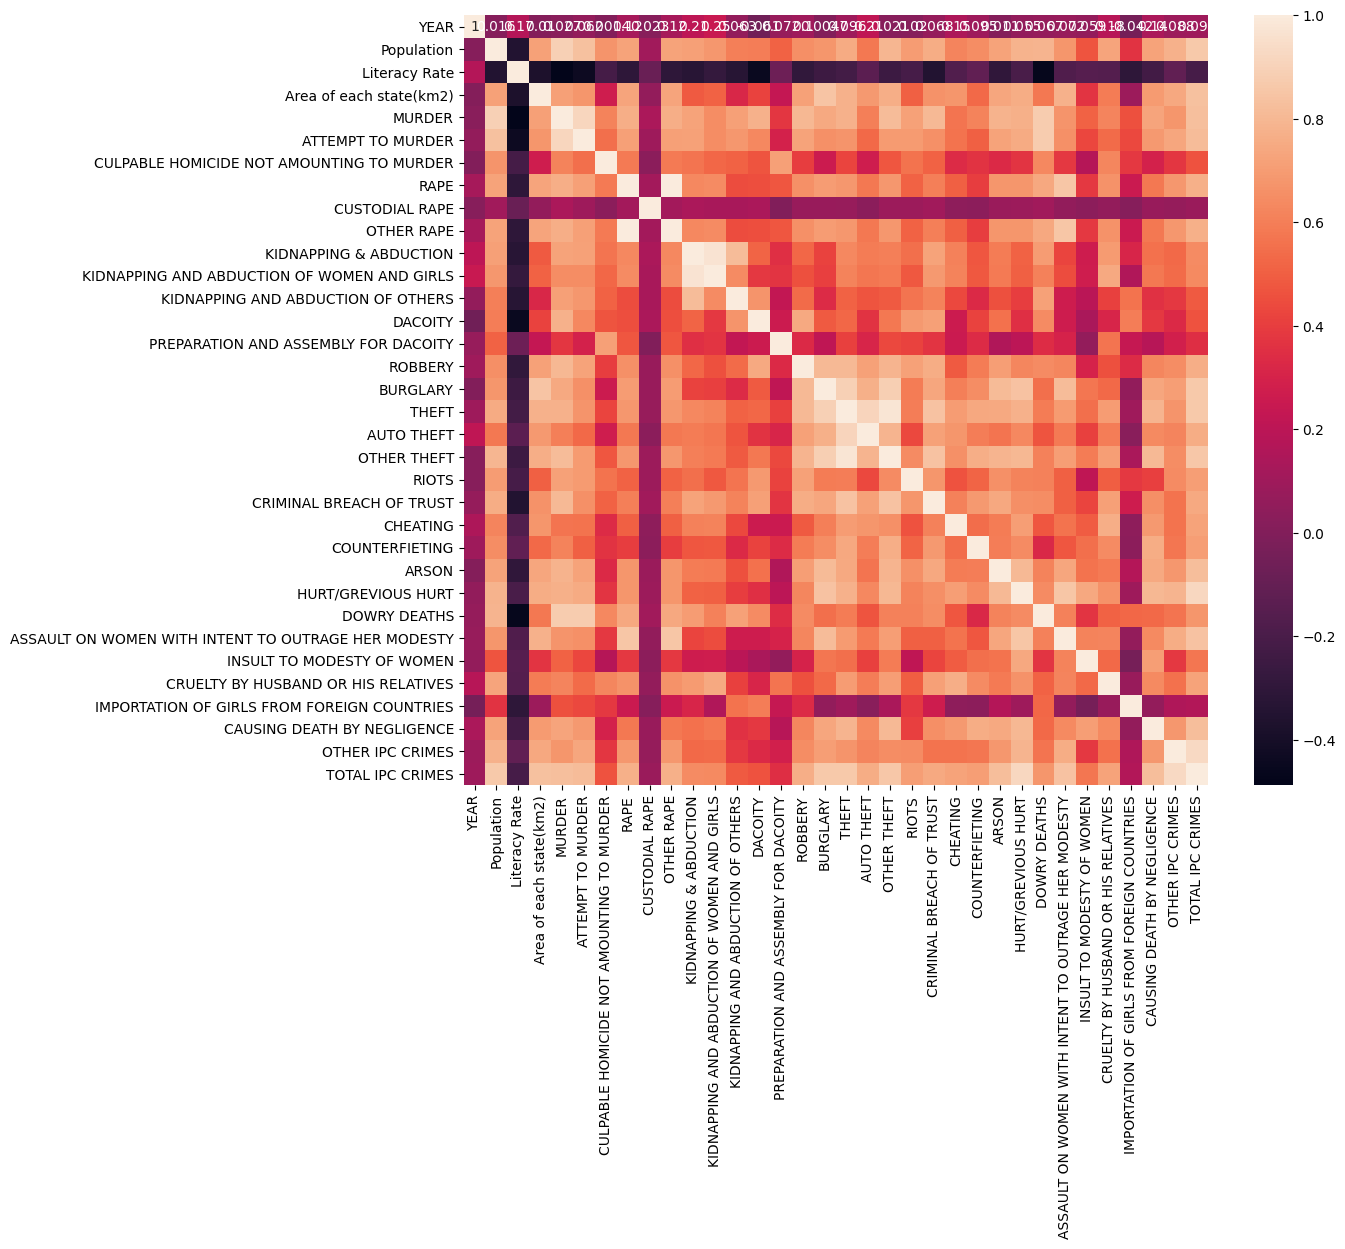

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(dff_int.corr(),annot = True)
plt.show()

### REQ 2.1 -
Evident from this picture, Total number of crimes and literacy rate are negatively correlated, which means they have an inverse relation. As Literacy increases, crime decreases.

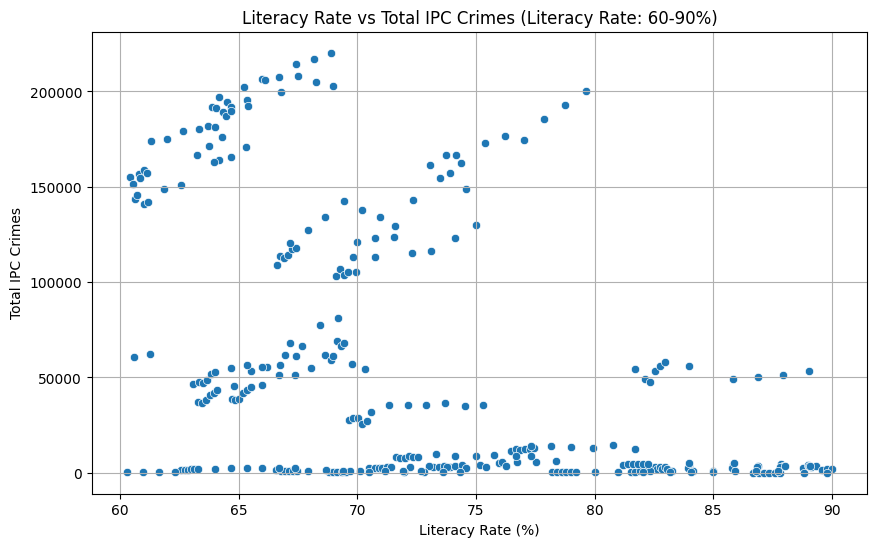

In [39]:
data_filtered = dff[(dff['Literacy Rate'] >= 60) & (dff['Literacy Rate'] <= 90)]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Literacy Rate', y='TOTAL IPC CRIMES', data=data_filtered)
plt.title('Literacy Rate vs Total IPC Crimes (Literacy Rate: 60-90%)')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.show()

As the data has huge numbers, we can consider that a lot of population numbers are considered. Still it is evident that decrease in literacy rate increases the crime rates. This confirms the inverse relation between the two.

### REQ 2.2

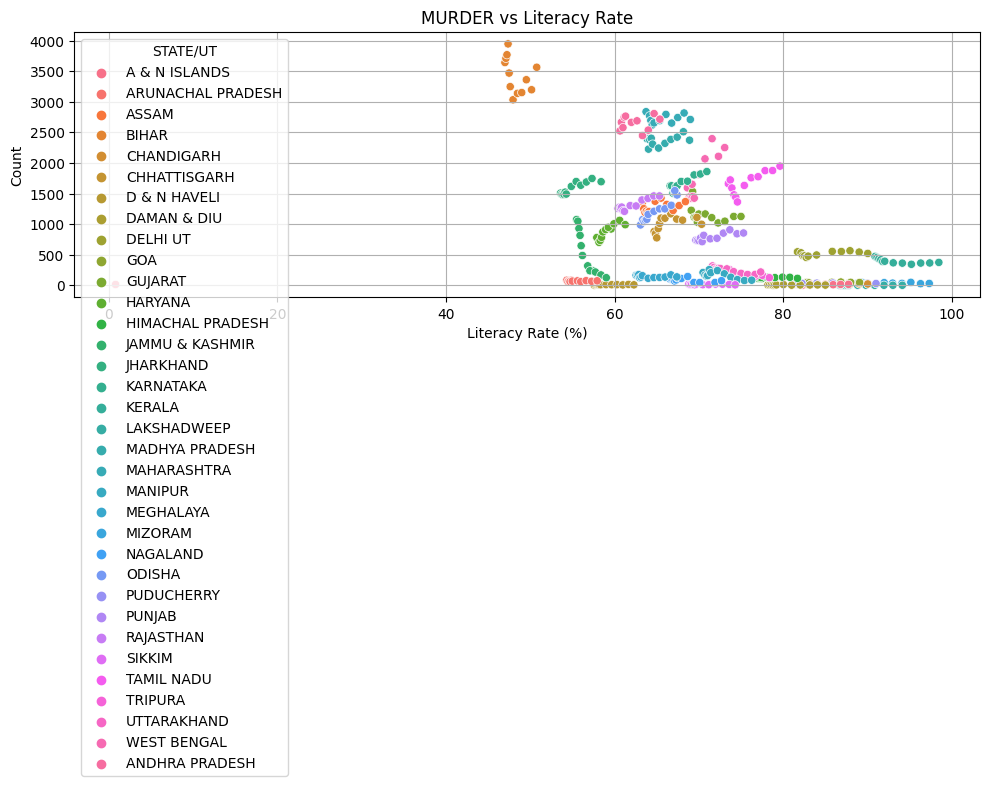

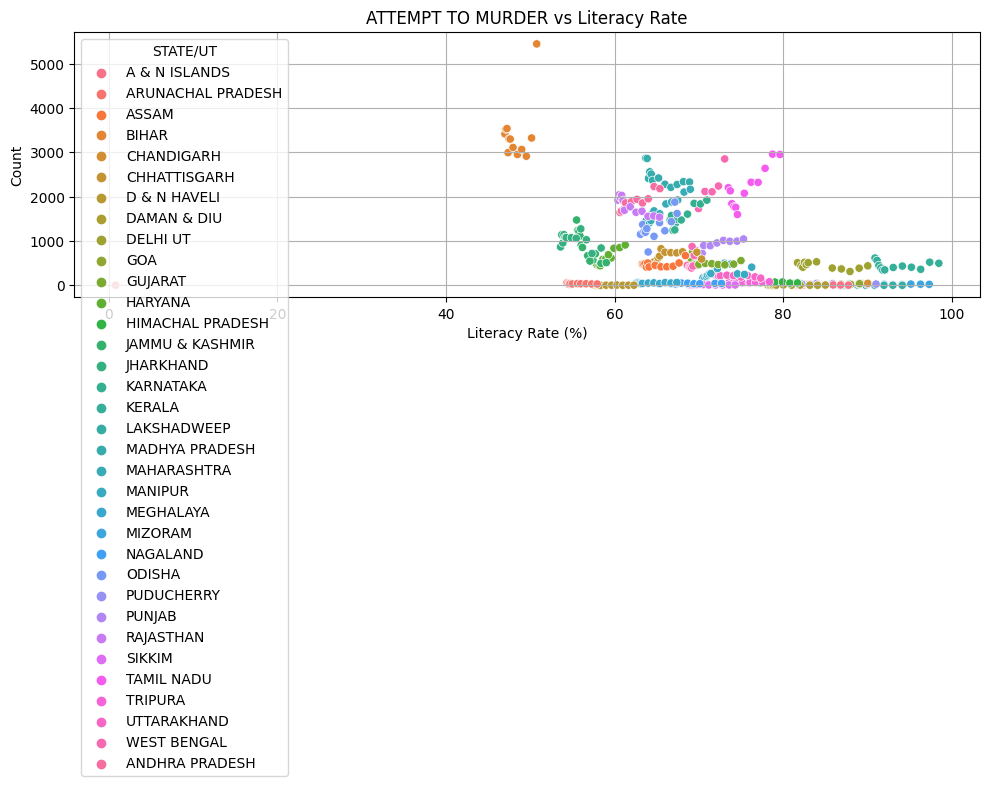

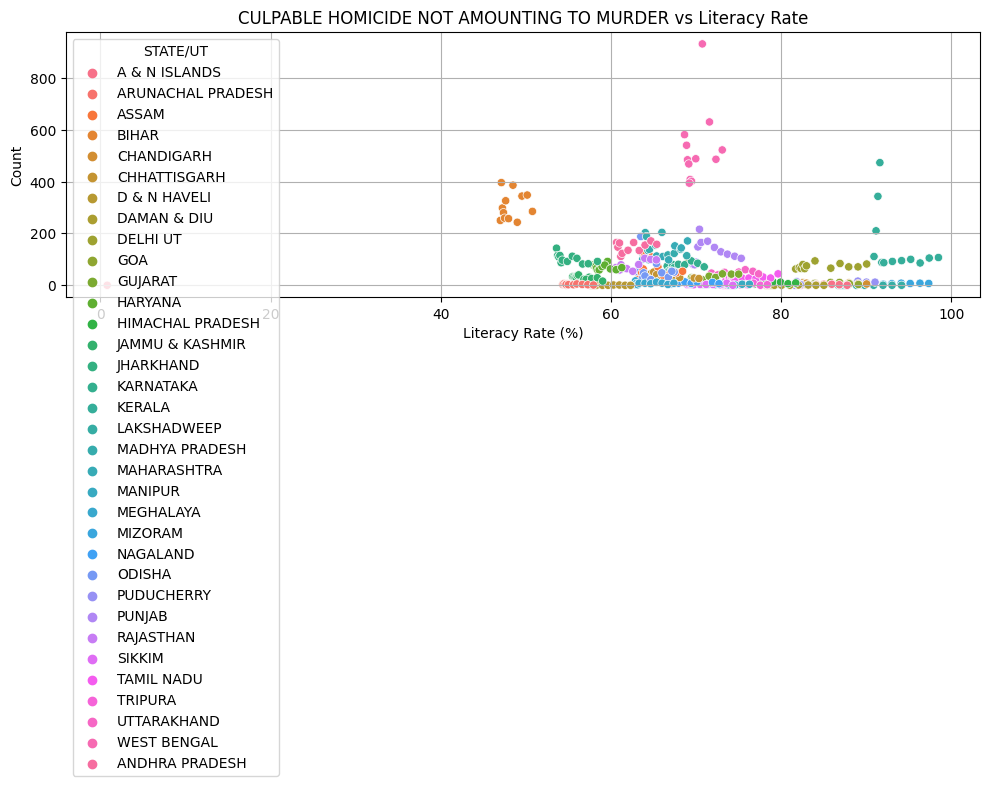

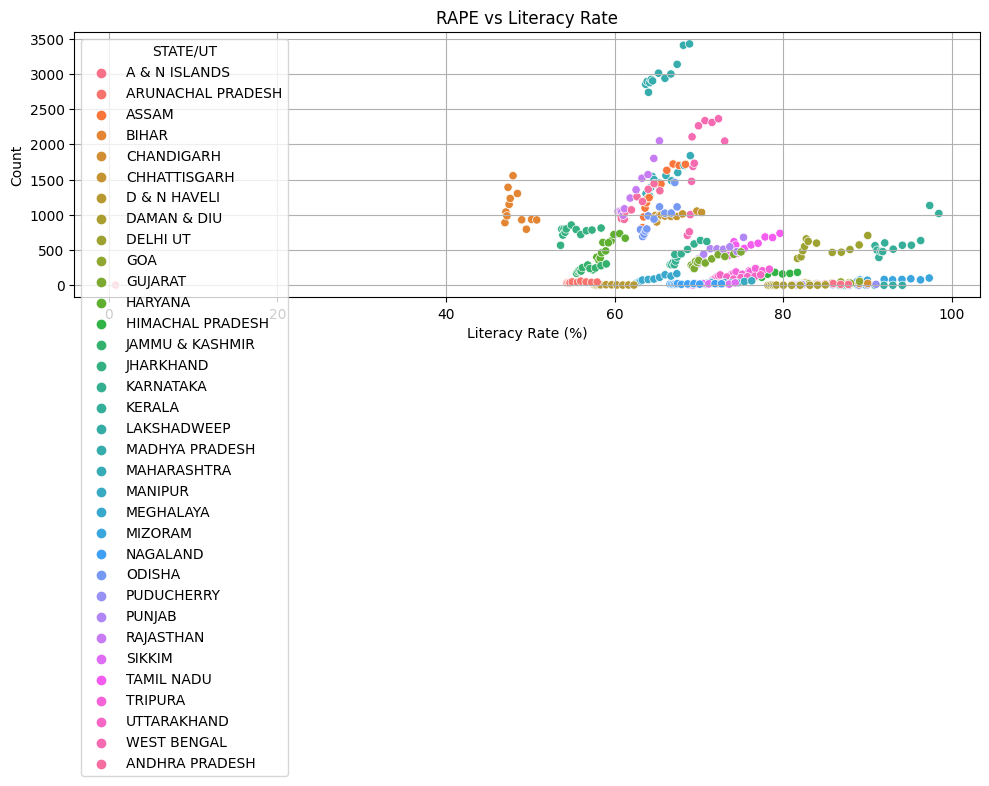

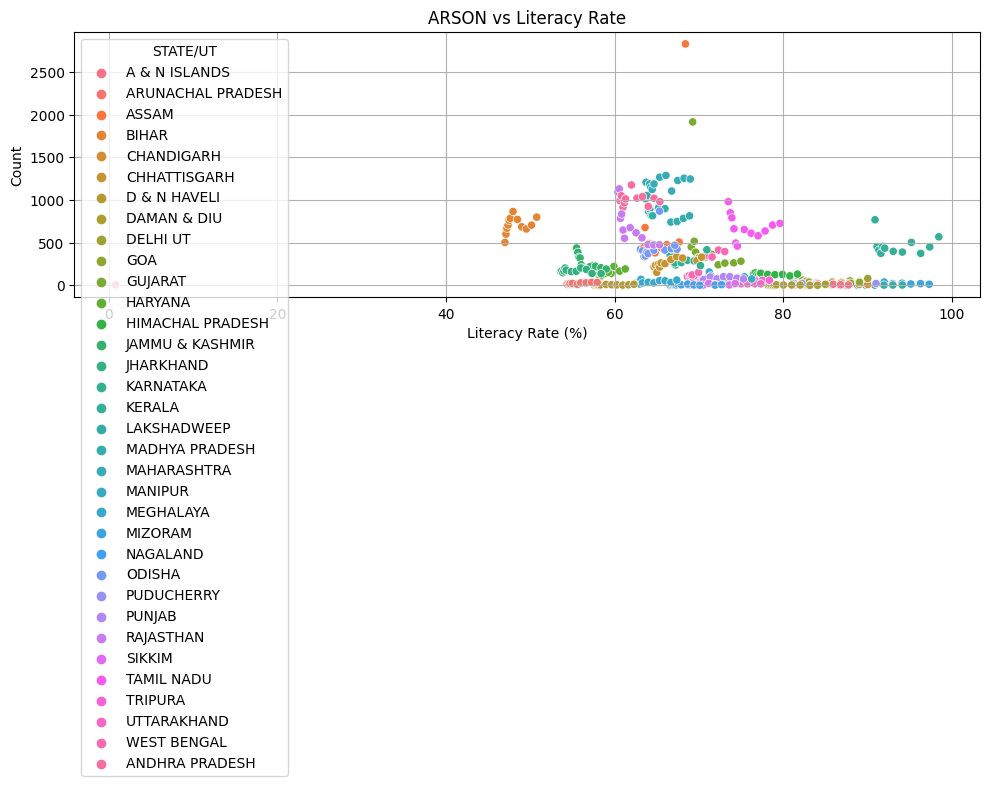

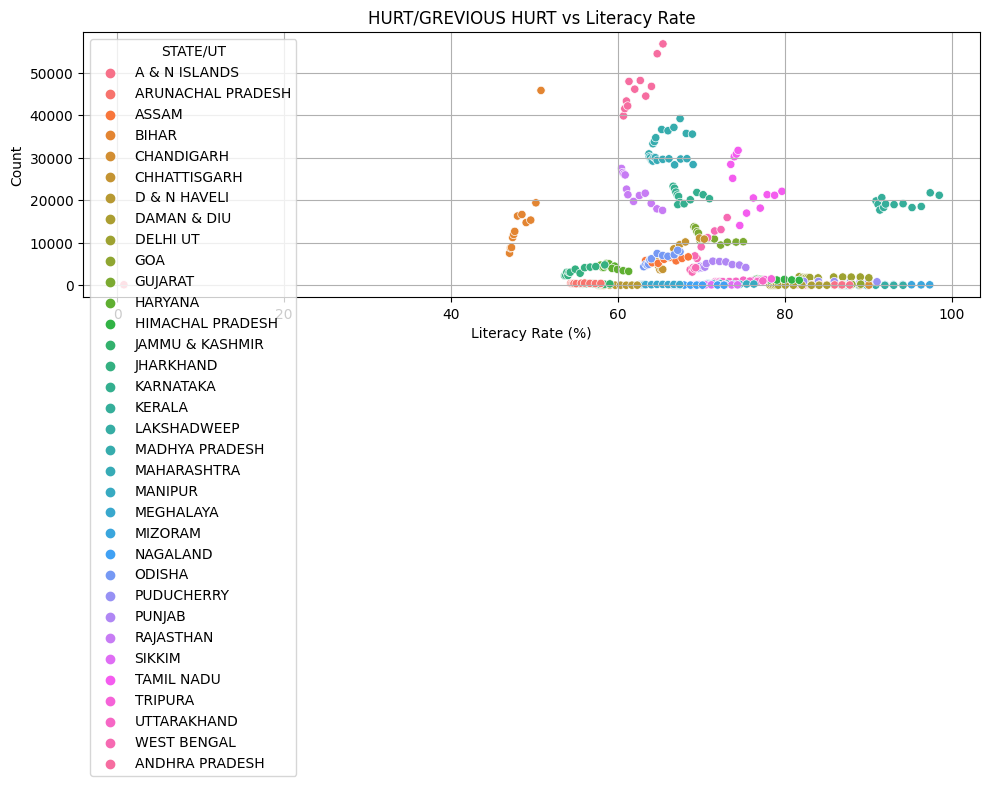

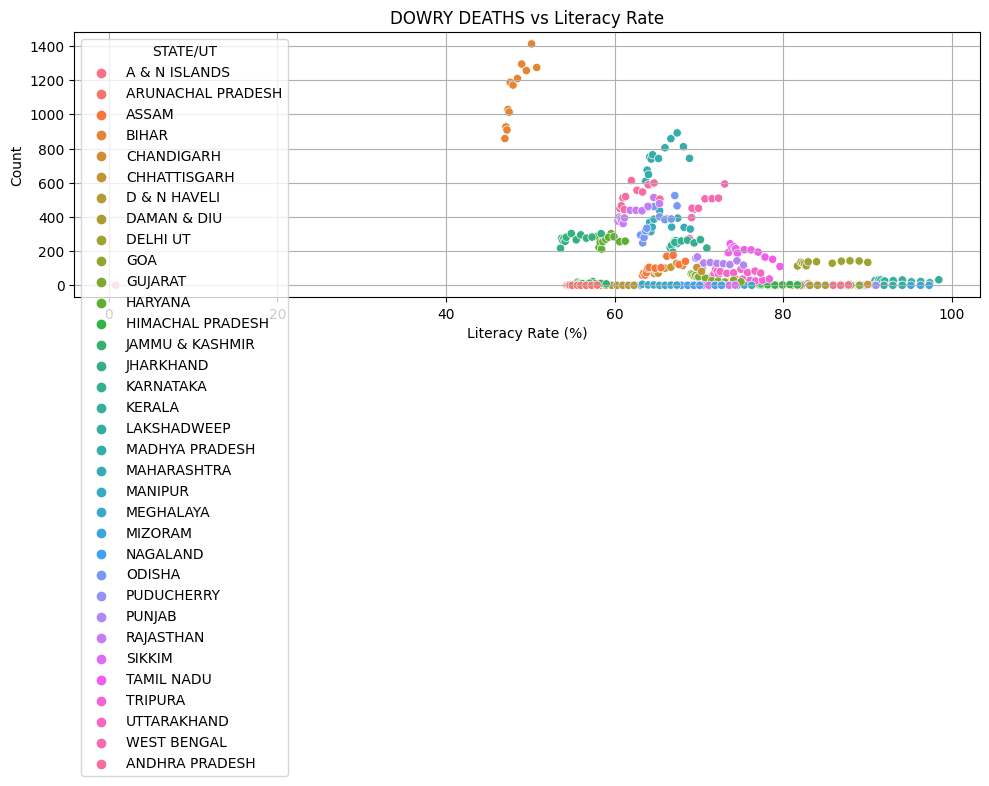

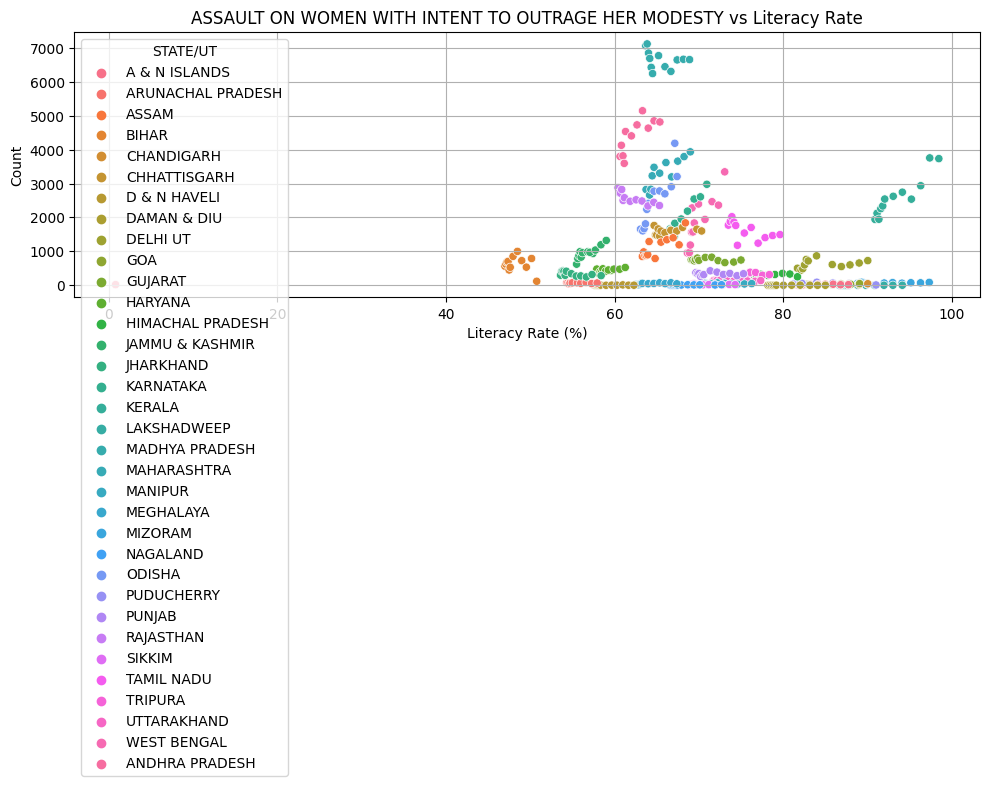

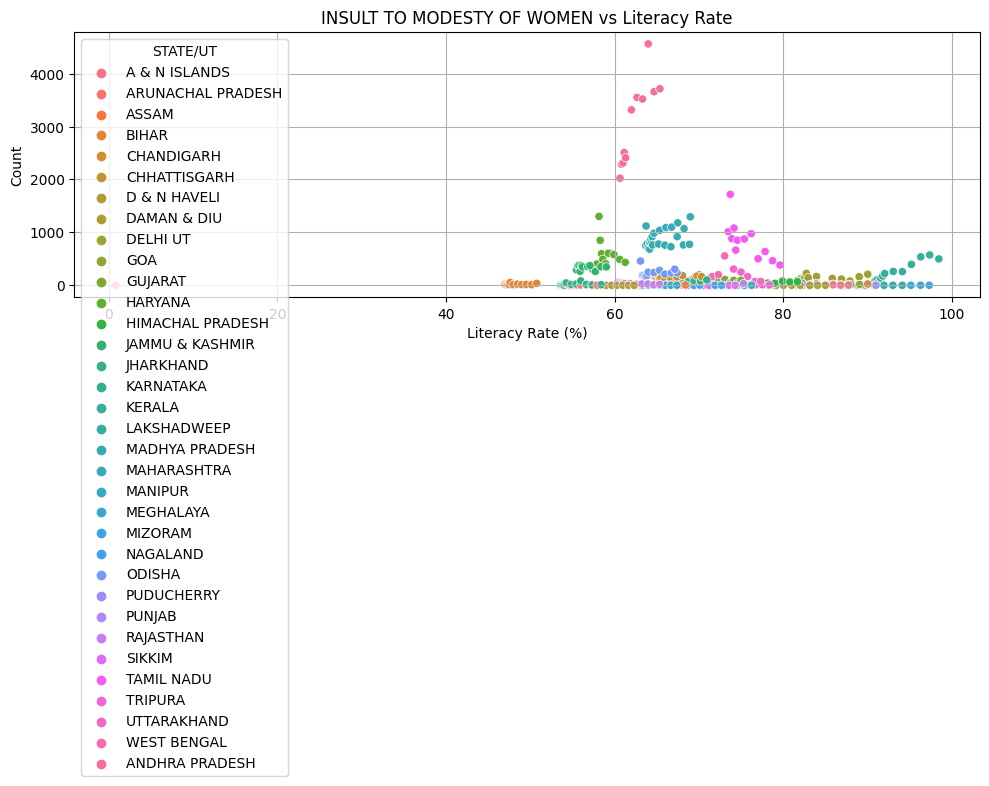

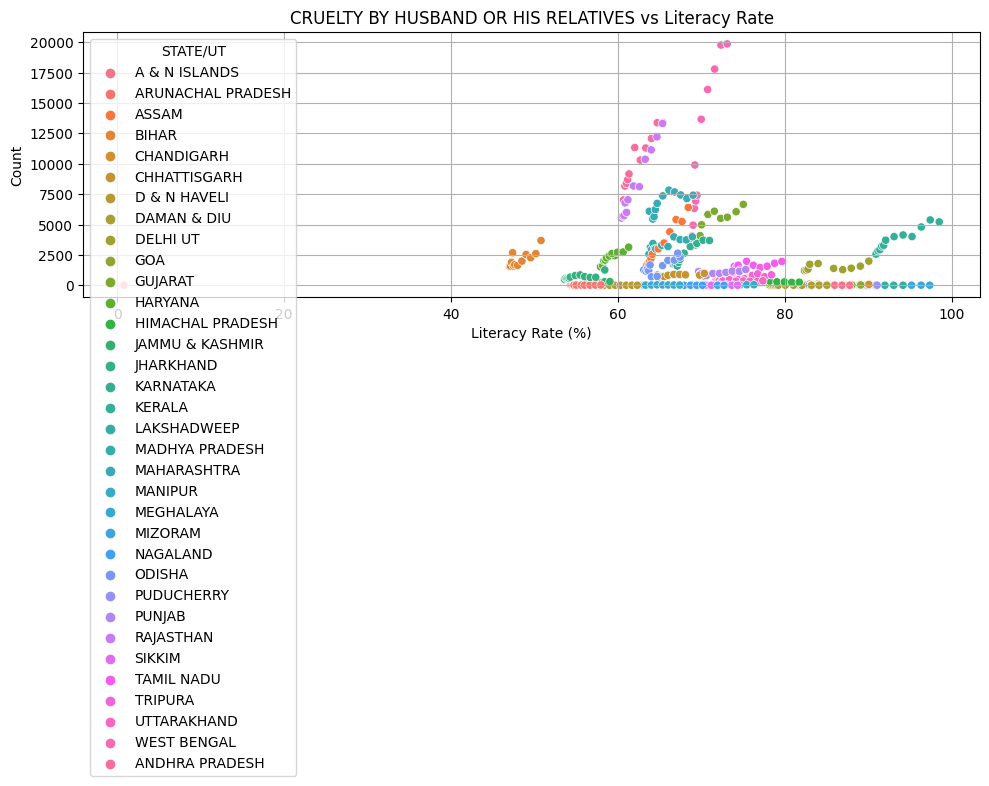

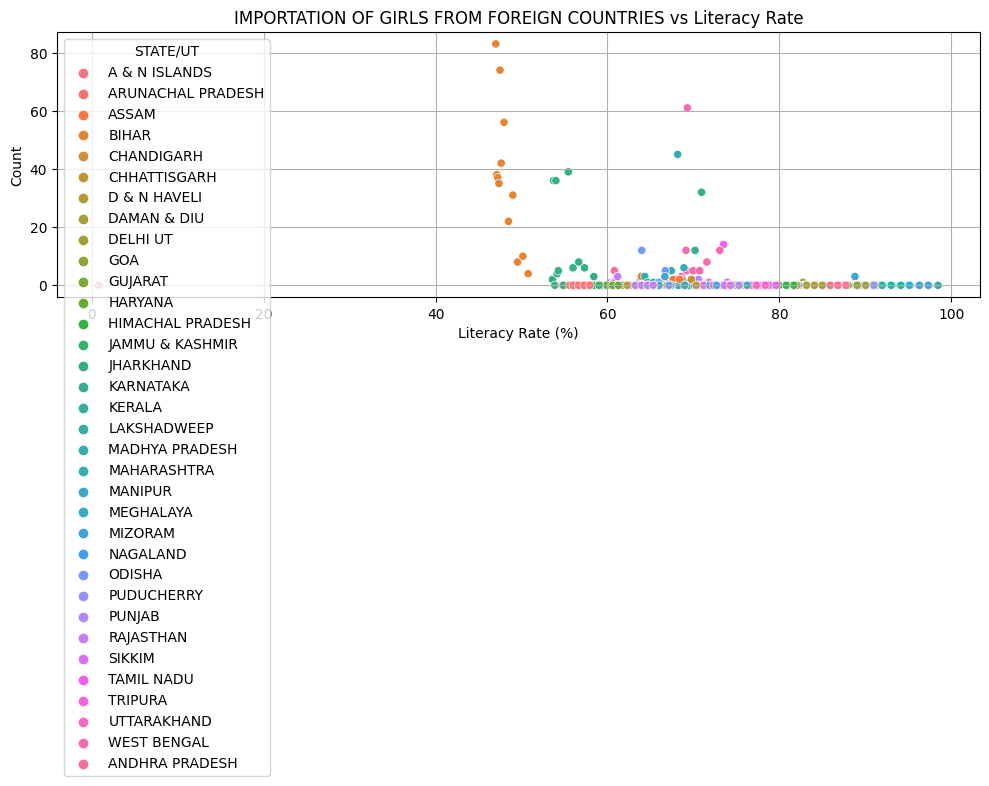

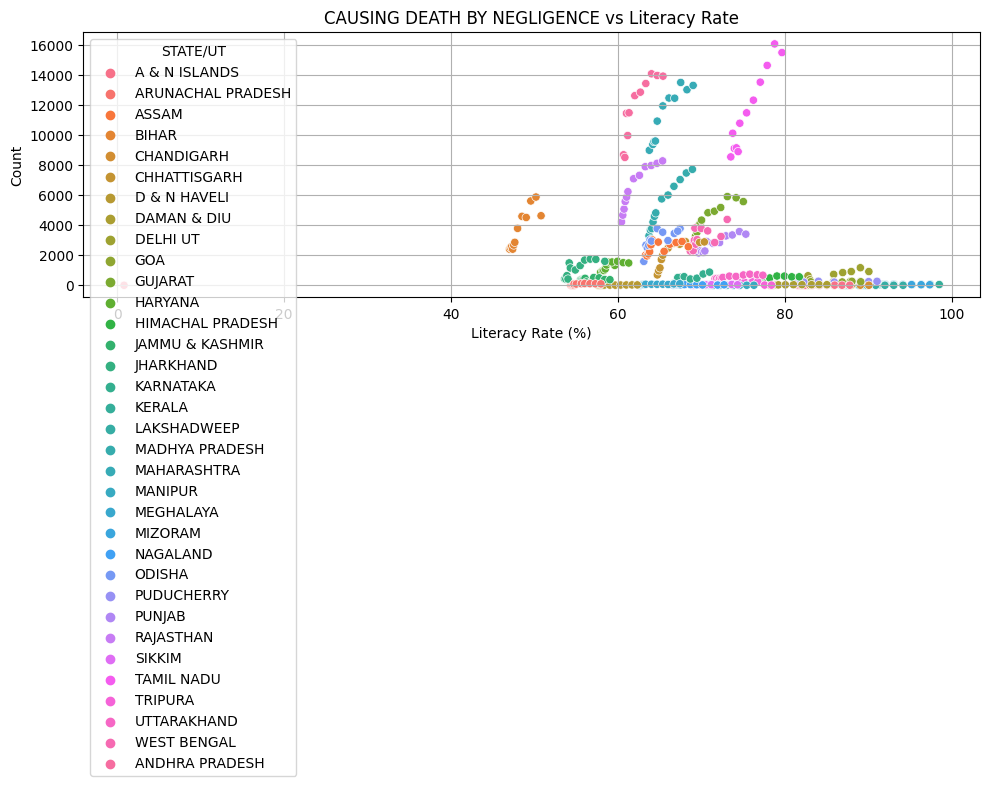

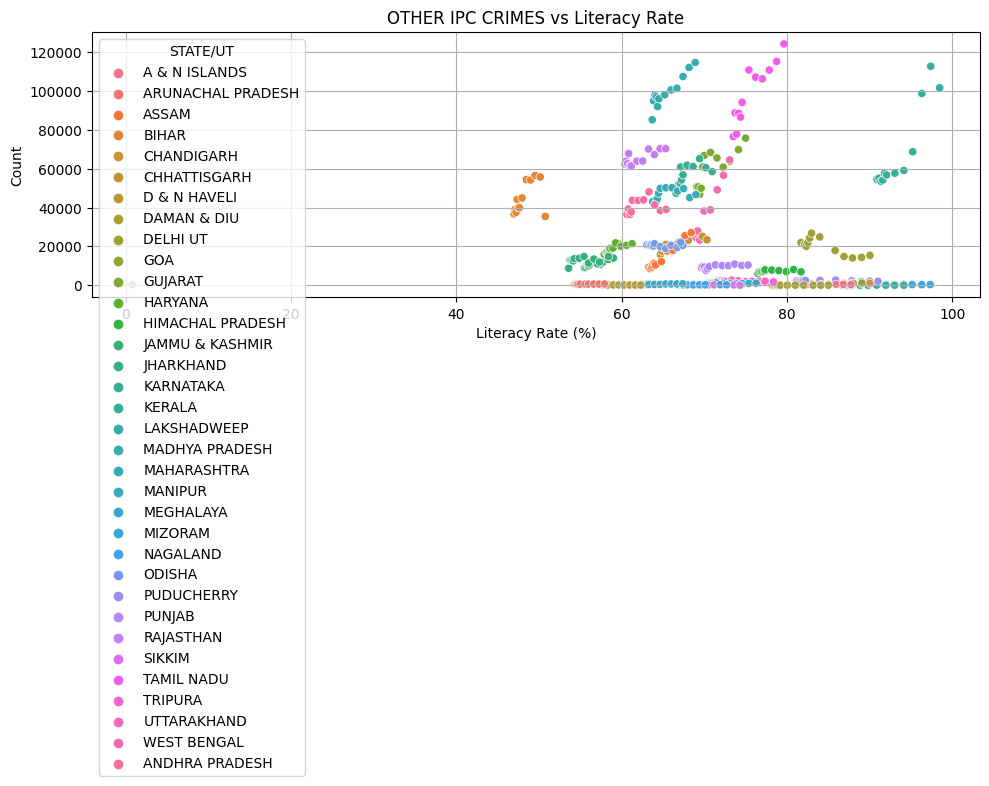

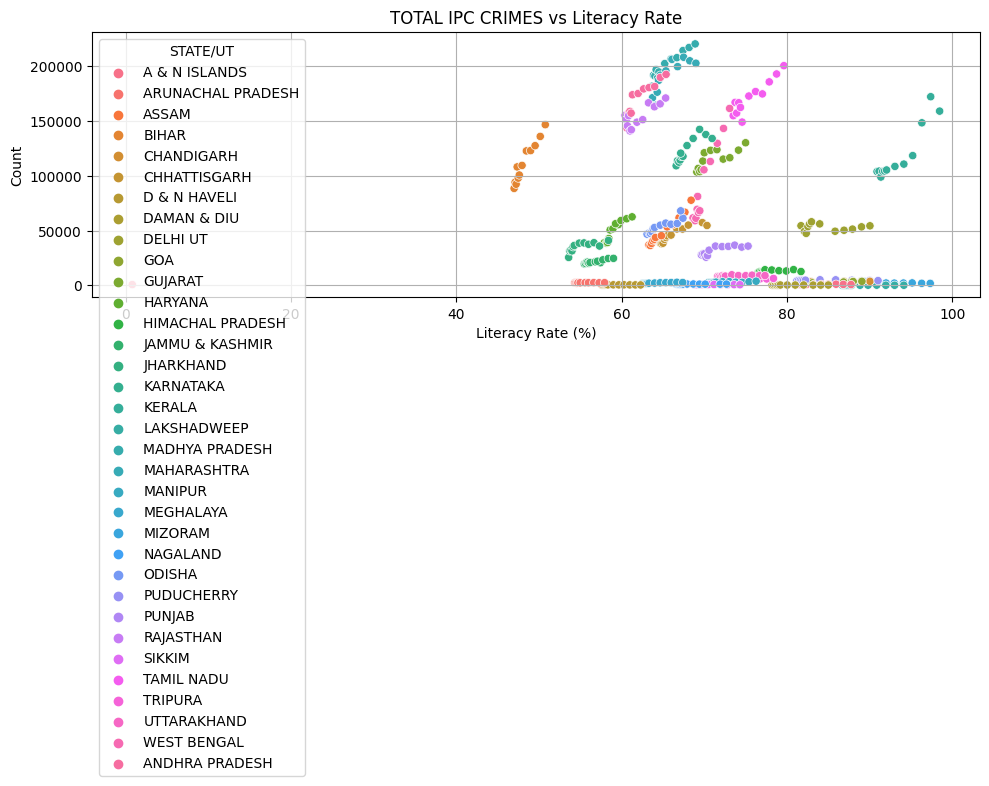

In [49]:
crime_cols = ['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']
data = dff[['STATE/UT', 'Literacy Rate'] + crime_cols]

data_melted = pd.melt(data, id_vars=['STATE/UT', 'Literacy Rate'], value_vars=crime_cols, var_name='Crime', value_name='Count')

data_melted = data_melted.dropna()

for crime in crime_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Literacy Rate', y='Count', hue='STATE/UT', data=data_melted[data_melted['Crime'] == crime], legend='full')
    plt.title(f'{crime} vs Literacy Rate')
    plt.xlabel('Literacy Rate (%)')
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### REQ 2.2
Analysis of the type of crime vs each state vs Literacy rate.
1) First one is murder, As evident in the graph, the state of Bihar tops the chart, it also has the lowest literacy rate. Further enforcing the fact that heinous crime like murder is done by people who arent educated. Bihar is an underdeveloped state with lots of illiteracy.The second one to top the list Maharashta, Madhya pradesh and West Bengal,Andhra pradesh having average literacy but above average murder rates pointing towards something else other then literacy affecting the numbers. This can also be considered because of them being advanced states , with active police machinery so greater reporting of those crimes.
2) Second is attempt to murder,where bihar still tops the list even in illiteracy. Poor infrastructure and less means of education create uncivilized people. it is again followed by Maharashtra an important business centre of our country, it can be concluded that murder and attempt to murder go side by side as its the same people who commit this, as also in the above chart, many states like arunachal pradesh, B & N Haveli, are backward in education and also backward in this crime, mainly because of it being a cultured state, places like kerala, mizoram, nagaland are top in education and thus see less crime rates.
3) culpable homicide not amounting to murder, sees developed states like west bengal topping the list with average literacy, These are crimes not commited with intention to harm, so high crime rate states like bihar doesnt top this, indicating that crimes in bihar are done intentionally, although states like karnataka and kerala are also there, these states with high level literacy indicate that, the more people are educated, the less they wanna cause harm.
4) The rape list is topped by Madhya pradesh, also with an above average education, shows that women safety is a matter that doesnt have relation with literacy, followed by andhra pradesh also having a better literacy, although states with higher literacy see less of this crime.
5) The list is topped by Assam with very few cases and above average literacy concludes this isnt done because of lack of literacy, also seen in gujarat, the few cases dont conclude anything. Lots of cases in maharashtra, with a good literacy shows other factors the reason behind this crime.
6) Hurt or grevious hurt crimes are seen in states like andhra pradesh with literacy, few cases in bihar with less literacy.
7) Dowry deaths, are backward crimes witnesed in less civilized places, bihar topping it with less literacy rate, concludes this is a crime thats inversely proportionte to literacy.
8) The crime of assaulting women to harm her modesty is seen most in states like madhya pradesh, with normal literacy rates, these crimes arent related to literacy.
9) insult to modesty of women is seen most in an average literacy society like andhra pradesh, low literacy states like bihar see negligible crimes like these.
10) Cruelty by husband or relatives towards women is again seen in andhrapradesh,in higher rates. The rest of the states have less occurence of these crimes.
11) Importation of women from foreign nations or in other terms slavery, is seen in high cases in bihar, the rest of the states have very low cases like these and with their hogh illiteracy rate, people forget the basic human emotions.
12) Causing death by negligence is a crime commited by people who are careless, seen in tamilnadu, Andaman and nicobar islands, with high level of literacy just shows that these crimes arent related to the liteacy level of the people and is affected by other factors.
13) Other crimes which can include various types of crimes are seen queally in many states with level of literacy, which conclude they arent related to literacy.
14) Total number of crime, where bihar has a large number and lowest literacy still doesnt top the list, andhra pradesh has the highest numner of crime despite having efficient literacy stating that the crimes are related to other factors. different states have different level of crime levels, irrespective of literacy so other factors have major roles in local state wise crimes.

### REQ 2.3

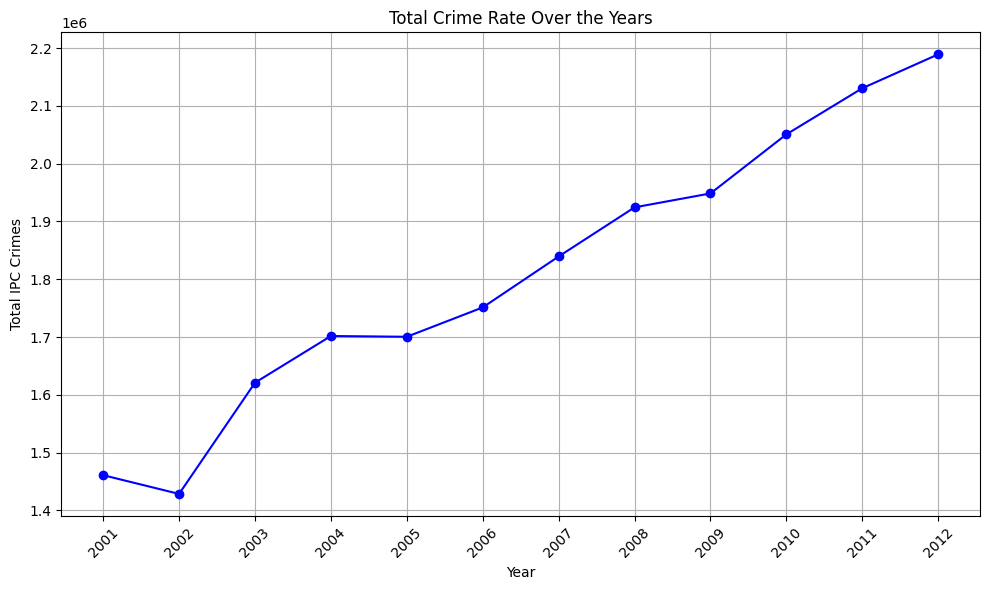

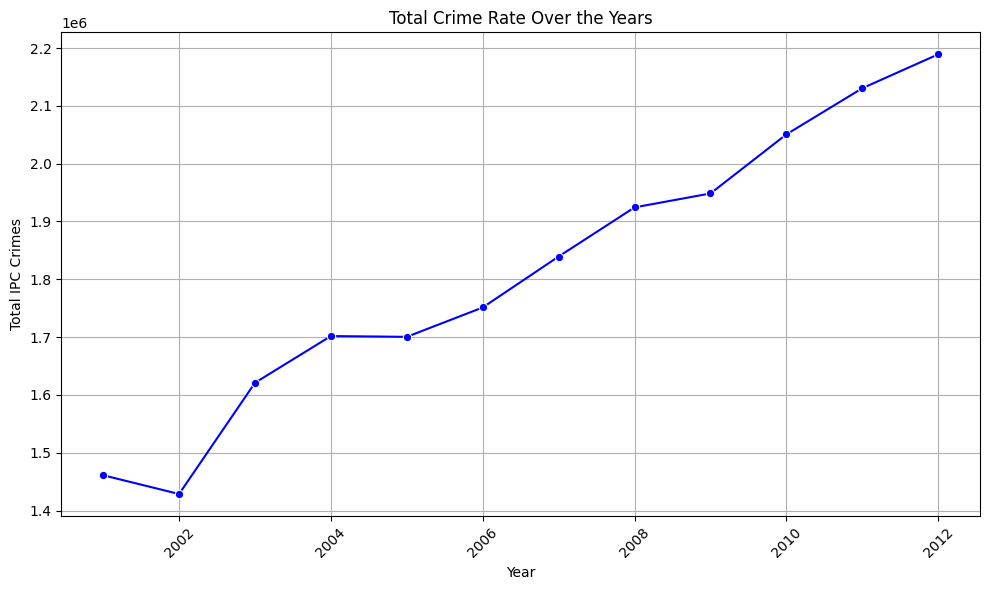

In [51]:
total_crime_by_year = dff.groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(total_crime_by_year['YEAR'], total_crime_by_year['TOTAL IPC CRIMES'], marker='o', color='b')
plt.title('Total Crime Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.xticks(total_crime_by_year['YEAR'], rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_crime_by_year, x='YEAR', y='TOTAL IPC CRIMES', marker='o', color='b')
plt.title('Total Crime Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The above graph shows an upward trend in crime rates as the year increases, while 2001 saw a decline, it saw a drastic surge in crime after that, where the trend didnt show any sign of stopping or slowing.

### REQ 2.4

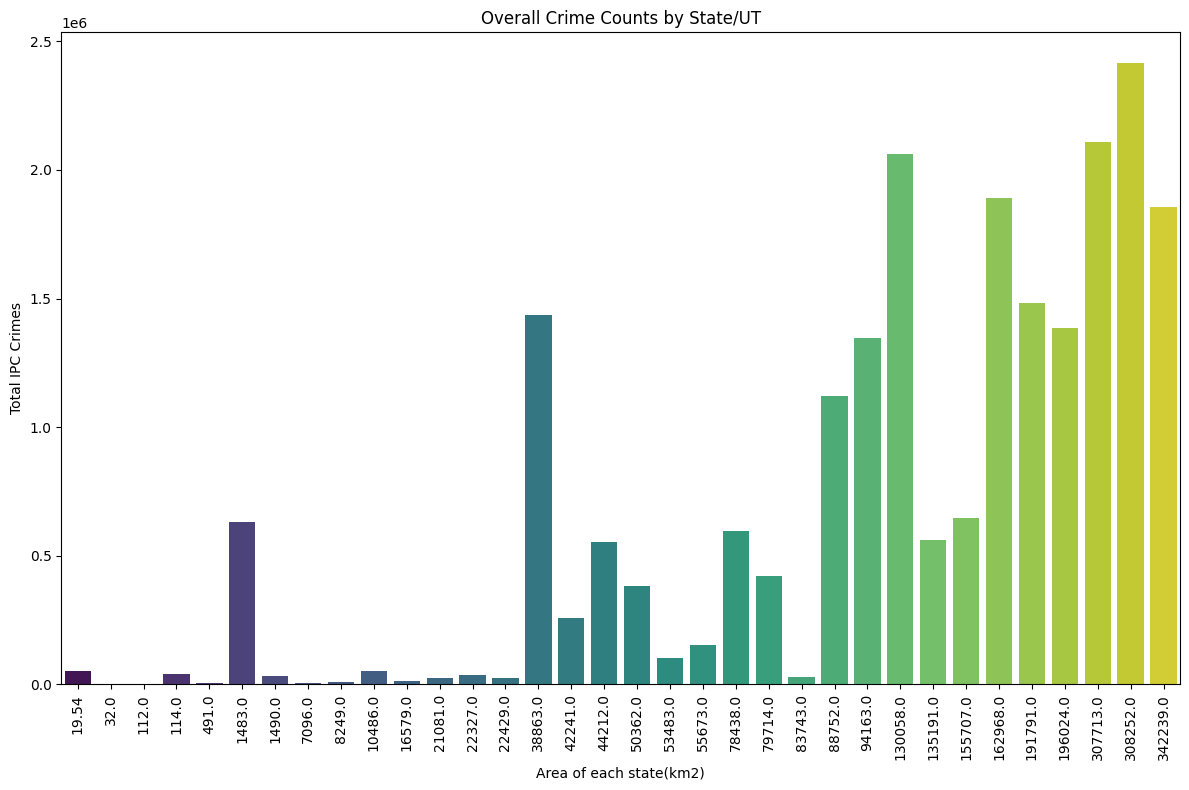

In [53]:
overall_crime_by_area = dff.groupby('Area of each state(km2)')['TOTAL IPC CRIMES'].sum().reset_index()

overall_crime_by_area = overall_crime_by_area.sort_values(by='TOTAL IPC CRIMES', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=overall_crime_by_area, x='Area of each state(km2)', y='TOTAL IPC CRIMES', palette='viridis')
plt.title('Overall Crime Counts by State/UT')
plt.xlabel('Area of each state(km2)')
plt.ylabel('Total IPC Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The relation between area of a state and crime rate is concluded by the above graph, we can see as the landmass area increases theres a surge in crimes, leaving a few exceptions, this is true in most cases.

### REQ 2.5

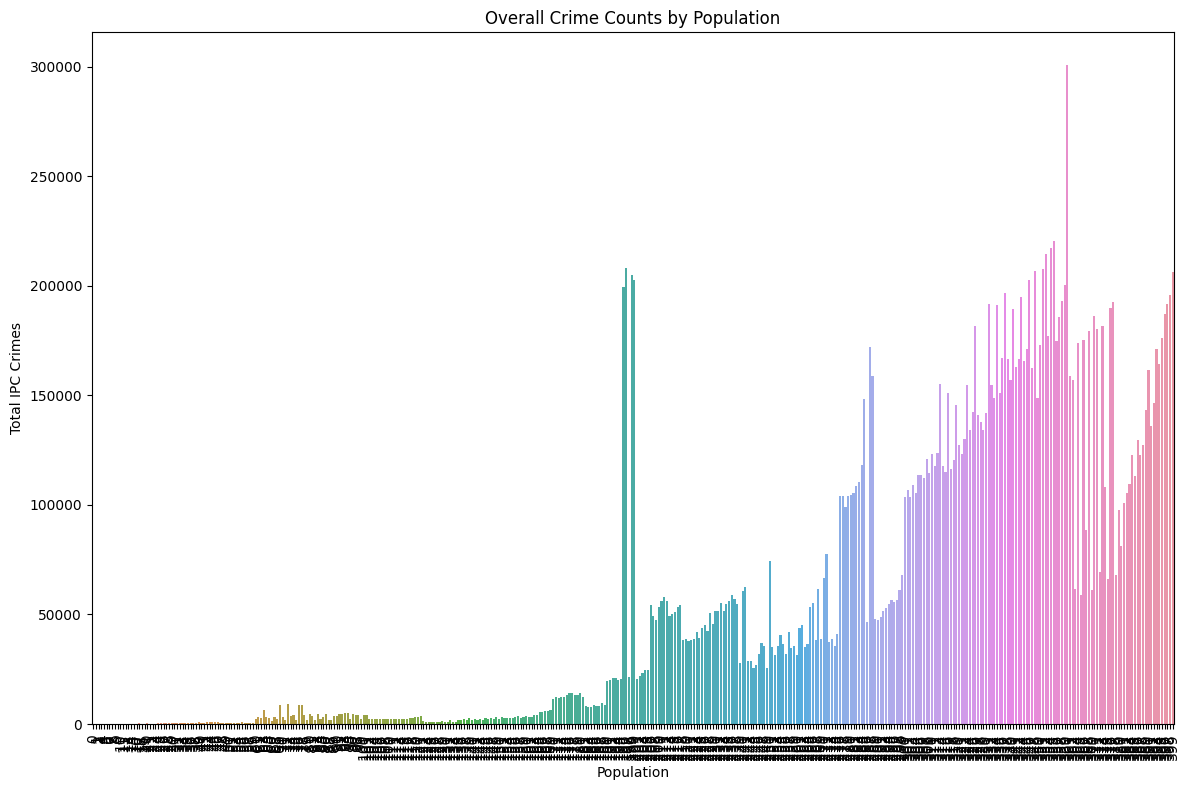

In [8]:
analysis = dff.groupby('Population')['TOTAL IPC CRIMES'].sum().reset_index()
analysis = analysis.sort_values(by='TOTAL IPC CRIMES', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=analysis, x=analysis.index, y='TOTAL IPC CRIMES')
plt.title('Overall Crime Counts by Population')
plt.xlabel('Population')
plt.ylabel('Total IPC Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

the above graph shows a lot of data and we can safely say that as the population increases we see an uprise in crimes.

### REQ 2.5


Based on the observations me made through various visual analytics, we can give state crime report for each state,
starting with A & N islands, although it also saw a surge in crimes as years passed, the crimes here are relatively low given its low population and small land mass. Arunachal pradesh saw most crimes of theft while bulgary was also a major problem there given its literacy rate. Assam also sees major theft crimes followed by murders and a very high level of rioting cases. Bihar is one of the most dangerous states, with very high level of theft, murders and kidnapping, abduction cases. Chattisgarh sees high level of thefts, burgalry followed by murders which are less compared to top ranking states, but still conisderable. Goa is a small state with level of tourism, they see relatively low crime rates with thefts , hurt/grevious hurt cases and than murders. Gujarat has record numbers of thefts , hurt grevious hurt and burgalry cases are very high.
Haryana also sees a high level of theft, hurt and murder cases. JnK has relativley few cases of thefts and a little high number of murders, given its unstable landscape. Jharkhand a rural land sees high level of theft and murder cases followed by greviously hurt cases. Karnataka has record numbers of thefts followed by burgalry and hurt cases. Kerala with a very high level of literacy still sees large number of thefts followed by griveious hurt and burgalry. Madhya pradesh topped the list of most crimes , with large number of crimes attributed to this state.
Manipur a relatively unstable place, still sees few number of crimes, low number of thefts and murders are there. Meghalaya also a peaceful state, sees less number of crimes. Mizoram sees thefts and hurt rates with less murders. Nagaland also sees less crimes due to its small size and population, Odisha has a relatively high number  of crime with burgalry and thefts topping the list. Punjab being a literate state sees high number of burgalry rates with thefts. Rajasthan sees very high number of crimes with thefts top of the charts, followed by burgalry. Sikkim sees low level of crimes. Tamilnadu despite being one of the most literate state sees a lot of crimes. Tripura sees low number if crimes. uttarakhand has average number of crimes while west bengal has large number of crimes. 


# Phase3

### REQ 3.1

In [20]:
# Read the CSV file into a DataFrame
crime_data = pd.read_csv("42_District_wise_crimes_committed_against_women_2001_2012.csv", delimiter='\t')

# Create a connection to an SQLite database
conn = sqlite3.connect(':memory:')  # Use ':memory:' to create an in-memory database, or provide a file path for a persistent database

# Create a cursor object
cur = conn.cursor()

# Create a table to store the data
cur.execute('''CREATE TABLE IF NOT EXISTS crimes_against_women (
                STATE_UT TEXT,
                DISTRICT TEXT,
                YEAR INTEGER,
                MURDER INTEGER,
                ATTEMPT_TO_MURDER INTEGER,
                CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER INTEGER,
                RAPE INTEGER,
                CUSTODIAL_RAPE INTEGER,
                OTHER_RAPE INTEGER,
                KIDNAPPING_ABDUCTION INTEGER,
                KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS INTEGER,
                KIDNAPPING_AND_ABDUCTION_OF_OTHERS INTEGER,
                DACOITY INTEGER,
                PREPARATION_AND_ASSEMBLY_FOR_DACOITY INTEGER,
                ROBBERY INTEGER,
                BURGLARY INTEGER,
                THEFT INTEGER,
                AUTO_THEFT INTEGER,
                OTHER_THEFT INTEGER,
                RIOTS INTEGER,
                CRIMINAL_BREACH_OF_TRUST INTEGER,
                CHEATING INTEGER,
                COUNTERFIETING INTEGER,
                ARSON INTEGER,
                HURT_GREVIOUS_HURT INTEGER,
                DOWRY_DEATHS INTEGER,
                ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY INTEGER,
                INSULT_TO_MODESTY_OF_WOMEN INTEGER,
                CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES INTEGER,
                IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES INTEGER,
                CAUSING_DEATH_BY NEGLIGENCE INTEGER,
                OTHER_IPC_CRIMES INTEGER,
                TOTAL_IPC_CRIMES INTEGER
            )''')

# Insert data into the table
crime_data.to_sql('crimes_against_women', conn, if_exists='replace', index=False)

# Display the table
cur.execute("SELECT * FROM crimes_against_women")
columns = [description[0] for description in cur.description]
print(columns)
for row in cur.fetchall():
    print(row)

# Close the connection
conn.close()

['STATE/UT,"DISTRICT","Year","Rape","Kidnapping and Abduction","Dowry Deaths","Assault on women with intent to outrage her modesty","Insult to modesty of Women","Cruelty by Husband or his Relatives","Importation of Girls"']
('ANDHRA PRADESH,"ADILABAD",2001,50,30,16,149,34,175,0',)
('ANDHRA PRADESH,"ANANTAPUR",2001,23,30,7,118,24,154,0',)
('ANDHRA PRADESH,"CHITTOOR",2001,27,34,14,112,83,186,0',)
('ANDHRA PRADESH,"CUDDAPAH",2001,20,20,17,126,38,57,0',)
('ANDHRA PRADESH,"EAST GODAVARI",2001,23,26,12,109,58,247,0',)
('ANDHRA PRADESH,"GUNTAKAL RLY.",2001,0,0,0,1,0,0,0',)
('ANDHRA PRADESH,"GUNTUR",2001,54,51,7,139,129,378,0',)
('ANDHRA PRADESH,"HYDERABAD CITY",2001,37,39,24,118,27,746,0',)
('ANDHRA PRADESH,"KARIMNAGAR",2001,56,49,62,414,81,224,0',)
('ANDHRA PRADESH,"KHAMMAM",2001,47,30,17,180,336,172,0',)
('ANDHRA PRADESH,"KRISHNA",2001,37,21,10,208,72,265,0',)
('ANDHRA PRADESH,"KURNOOL",2001,29,47,13,141,107,92,0',)
('ANDHRA PRADESH,"MAHABOOBNAGAR",2001,59,27,14,176,41,69,0',)
('ANDHRA PRAD

In [33]:
conn = sqlite3.connect('crime_database.db')

# Create a cursor object
cur = conn.cursor()

# Get the table schema
cur.execute("PRAGMA table_info(crimes_against_women)")
columns = cur.fetchall()

# Print column names and types
for column in columns:
    print(column)

# Close the connection
conn.close()

(0, 'STATE/UT', 'TEXT', 0, None, 0)
(1, 'DISTRICT', 'TEXT', 0, None, 0)
(2, 'Year', 'INTEGER', 0, None, 0)
(3, 'Rape', 'INTEGER', 0, None, 0)
(4, 'Kidnapping and Abduction', 'INTEGER', 0, None, 0)
(5, 'Dowry Deaths', 'INTEGER', 0, None, 0)
(6, 'Assault on women with intent to outrage her modesty', 'INTEGER', 0, None, 0)
(7, 'Insult to modesty of Women', 'INTEGER', 0, None, 0)
(8, 'Cruelty by Husband or his Relatives', 'INTEGER', 0, None, 0)
(9, 'Importation of Girls', 'INTEGER', 0, None, 0)


### REQ 3.2

In [35]:
conn = sqlite3.connect('crime_database.db')

cur = conn.cursor()

# SQL query
sql_query = """
    SELECT 
        "STATE/UT",
        DISTRICT,
        Year,
        MAX(Rape) AS MAX_RAPES,
        MAX("Kidnapping and Abduction") AS MAX_KIDNAPPINGS
    FROM
        crimes_against_women
    GROUP BY
        "STATE/UT", Year
    ORDER BY
        MAX_RAPES DESC, MAX_KIDNAPPINGS DESC
    LIMIT 1;
"""

cur.execute(sql_query)

result = cur.fetchone()

conn.close()

print("highest number of rapes & Kidnappings that happened in X state, District, and year :")
print("State/UT:", result[0])
print("District:", result[1])
print("Year:", result[2])
print("Maximum Rapes:", result[3])
print("Maximum Kidnappings:", result[4])

highest number of rapes & Kidnappings that happened in X state, District, and year :
State/UT: MADHYA PRADESH
District: TOTAL
Year: 2012
Maximum Rapes: 3425
Maximum Kidnappings: 1127


### REQ 3.3

In [42]:
conn = sqlite3.connect('crime_database.db')

cur = conn.cursor()

# SQL query
sql_query = """
    SELECT 
    "STATE/UT" AS STATE_UT,
    DISTRICT,
    Year,
    MIN(Rape) AS MIN_RAPES,
    MIN("Kidnapping and Abduction") AS MIN_KIDNAPPINGS
FROM
    crimes_against_women
GROUP BY
    "STATE/UT", Year
ORDER BY
    MIN_RAPES ASC, MIN_KIDNAPPINGS ASC;
"""

cur.execute(sql_query)

result = cur.fetchone()

conn.close()

print("lowest number of rapes & Kidnappings that happened in this state, District, and year:")
print("State/UT:", result[0])
print("District:", result[1])
print("Year:", result[2])
print("Rapes:", result[3])
print("Kidnappings:", result[4])

lowest number of rapes & Kidnappings that happened in this state, District, and year:
State/UT: A & N ISLANDS
District: NICOBAR
Year: 2001
Rapes: 0
Kidnappings: 0


### REQ 3.4

In [43]:
st_crime_data = pd.read_csv("02_District_wise_crimes_committed_against_ST_2001_2012.csv")

conn = sqlite3.connect('crime_database.db')

cur = conn.cursor()

cur.execute('''CREATE TABLE IF NOT EXISTS crimes_against_st (
                "STATE/UT" TEXT,
                DISTRICT TEXT,
                YEAR INTEGER,
                RAPE INTEGER,
                "Kidnapping and Abduction" INTEGER,
                "Dowry Deaths" INTEGER,
                "Assault on women with intent to outrage her modesty" INTEGER,
                "Insult to modesty of Women" INTEGER,
                "Cruelty by Husband or his Relatives" INTEGER,
                "Importation of Girls" INTEGER
            )''')

st_crime_data.to_sql('crimes_against_st', conn, if_exists='replace', index=False)

conn.commit()

cur.execute("SELECT * FROM crimes_against_st")
rows = cur.fetchall()

for row in rows:
    print(row)

conn.close()

('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 2, 0, 0, 0, 2, 0, 0, 13)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 0, 0, 0, 0, 0, 7, 0, 1, 6)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 0, 2, 1, 0, 0, 0, 10, 0, 3, 19)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 0, 0, 0, 0, 0, 0, 15, 0, 0, 2)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 1, 4, 0, 0, 0, 0, 8, 0, 9, 20)
('ANDHRA PRADESH', 'KRISHNA', 2001, 0, 0, 1, 0, 0, 0, 6, 0, 24, 18)
('ANDHRA PRADESH', 'KURNOOL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 1, 1, 0, 0, 0, 0, 6, 0, 11, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 0, 1, 0, 0, 0, 1, 0, 0, 4, 3)
('ANDHRA PRADESH', 'NALGONDA', 2001, 

### REQ 3.5

In [44]:
conn = sqlite3.connect('crime_database.db')

cur = conn.cursor()

sql_query = """
    SELECT 
        DISTRICT,
        MAX(DACOITY) AS MAX_DACOITY,
        MAX(ROBBERY) AS MAX_ROBBERY
    FROM
        crimes_against_st;
"""

cur.execute(sql_query)

result = cur.fetchone()

print("District:", result[0])
print("Maximum Dacoity Incidents:", result[1])
print("Maximum Robbery Incidents:", result[2])

conn.close()

District: TOTAL
Maximum Dacoity Incidents: 29
Maximum Robbery Incidents: 34


### REQ 3.6

In [46]:
conn = sqlite3.connect('crime_database.db')

cur = conn.cursor()

#SQL query
sql_query = """
    SELECT 
        DISTRICT,
        MIN(MURDER) AS LOWEST_MURDER_COUNT
    FROM
        crimes_against_st
    GROUP BY
        DISTRICT
    ORDER BY
        LOWEST_MURDER_COUNT ASC;
"""

cur.execute(sql_query)

results = cur.fetchall()

for result in results:
    print("District:", result[0])
    print("Lowest Murder Count:", result[1])
    print("--------------------------")

conn.close()

District: 24 PARGANAS NORTH
Lowest Murder Count: 0
--------------------------
District: 24 PARGANAS SOUTH
Lowest Murder Count: 0
--------------------------
District: A and N ISLANDS
Lowest Murder Count: 0
--------------------------
District: ADILABAD
Lowest Murder Count: 0
--------------------------
District: AGRA
Lowest Murder Count: 0
--------------------------
District: AHMEDABAD COMMR.
Lowest Murder Count: 0
--------------------------
District: AHMEDABAD RURAL
Lowest Murder Count: 0
--------------------------
District: AHMEDNAGAR
Lowest Murder Count: 0
--------------------------
District: AHWA-DANG
Lowest Murder Count: 0
--------------------------
District: AIZAWL
Lowest Murder Count: 0
--------------------------
District: AJMER
Lowest Murder Count: 0
--------------------------
District: AKOLA
Lowest Murder Count: 0
--------------------------
District: ALAPUZHA
Lowest Murder Count: 0
--------------------------
District: ALIGARH
Lowest Murder Count: 0
--------------------------
Dist

### REQ 3.7

In [47]:
conn = sqlite3.connect('crime_database.db')

cur = conn.cursor()

# SQL query
sql_query = """
    SELECT 
        DISTRICT,
        YEAR,
        MURDER
    FROM
        crimes_against_st
    ORDER BY
        DISTRICT ASC,
        YEAR ASC,
        MURDER ASC;
"""

cur.execute(sql_query)

results = cur.fetchall()

for result in results:
    print("District:", result[0])
    print("Year:", result[1])
    print("Murder Count:", result[2])
    print("--------------------------")

conn.close()

District: 24 PARGANAS NORTH
Year: 2001
Murder Count: 0
--------------------------
District: 24 PARGANAS NORTH
Year: 2002
Murder Count: 0
--------------------------
District: 24 PARGANAS NORTH
Year: 2003
Murder Count: 0
--------------------------
District: 24 PARGANAS NORTH
Year: 2004
Murder Count: 0
--------------------------
District: 24 PARGANAS NORTH
Year: 2005
Murder Count: 0
--------------------------
District: 24 PARGANAS NORTH
Year: 2006
Murder Count: 0
--------------------------
District: 24 PARGANAS NORTH
Year: 2007
Murder Count: 0
--------------------------
District: 24 PARGANAS NORTH
Year: 2008
Murder Count: 0
--------------------------
District: 24 PARGANAS NORTH
Year: 2009
Murder Count: 0
--------------------------
District: 24 PARGANAS NORTH
Year: 2010
Murder Count: 0
--------------------------
District: 24 PARGANAS NORTH
Year: 2011
Murder Count: 0
--------------------------
District: 24 PARGANAS NORTH
Year: 2012
Murder Count: 0
--------------------------
District: 24 PAR

### REQ 3.8.1

In [48]:
ipc_crime_data = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")

selected_columns = ["STATE/UT", "DISTRICT", "YEAR", "MURDER", "ATTEMPT TO MURDER", "RAPE"]
selected_ipc_crime_data = ipc_crime_data[selected_columns]

conn = sqlite3.connect('crime_database.db')

cur = conn.cursor()

cur.execute('''CREATE TABLE IF NOT EXISTS ipc_crimes (
                STATE_UT TEXT,
                DISTRICT TEXT,
                YEAR INTEGER,
                MURDER INTEGER,
                ATTEMPT_TO_MURDER INTEGER,
                RAPE INTEGER
            )''')

selected_ipc_crime_data.to_sql('ipc_crimes', conn, if_exists='replace', index=False)

conn.commit()

cur.execute("SELECT * FROM ipc_crimes")
rows = cur.fetchall()

for row in rows:
    print(row)

conn.close()

('ANDHRA PRADESH', 'ADILABAD', 2001, 101, 60, 50)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 151, 125, 23)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 101, 57, 27)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 80, 53, 20)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 82, 67, 23)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 3, 1, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 182, 88, 54)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 111, 113, 37)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 162, 85, 56)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 93, 60, 47)
('ANDHRA PRADESH', 'KRISHNA', 2001, 65, 51, 37)
('ANDHRA PRADESH', 'KURNOOL', 2001, 133, 72, 29)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 157, 67, 59)
('ANDHRA PRADESH', 'MEDAK', 2001, 101, 56, 35)
('ANDHRA PRADESH', 'NALGONDA', 2001, 122, 60, 35)
('ANDHRA PRADESH', 'NELLORE', 2001, 89, 69, 46)
('ANDHRA PRADESH', 'NIZAMABAD', 2001, 106, 49, 21)
('ANDHRA PRADESH', 'PRAKASHAM', 2001, 102, 82, 19)
('ANDHRA PRADESH', 'RANGA REDDY', 2001, 214, 95, 72)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.

### REQ 3.8.2

In [56]:
ipc_crime_data

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
9012     LAKSHADWEEP    LAKSHADWEEP  2012       0                  0   
9013     LAKSHADWEEP          TOTAL  2012       0                  0   
9014      PUDUCHERRY       KARAIKAL  2012       5                  6   
9015      PUDUCHERRY     PUDUCHERRY  2012      24                 21   
9016      PUDUCHERRY          TOTAL  2012      29                 27   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                            17    50               0   
1                                             1    23               0   
2                                             2    27               0   
3                                             1    20               0   
4                                             1    23               0   
...                                         ...   ...             ...   
9012                                          0     0               0   
9013                                          0     0               0   
9014                                          2     6               0   
9015                                         10     7               0   
9016                                         12    13               0   

      OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0             50                      46  ...     30                1131   
1             23                      53  ...     69                1543   
2             27                      59  ...     38                2088   
3             20                      25  ...     23                 795   
4             23                      49  ...     41                1244   
...          ...                     ...  ...    ...                 ...   
9012           0                       0  ...      3                   3   
9013           0                       0  ...      3                   3   
9014           6                       2  ...      1                 186   
9015           7                      17  ...     20                 632   
9016          13                      19  ...     21                 818   

      DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0               16                                                149     
1                7                                                118     
2               14                                                112     
3               17                                                126     
4               12                                                109     
...            ...                                                ...     
9012             0                                                  1     
9013             0                                                  1     
9014             0                                                  2     
9015             0                                                  7     
9016             0                                                  9     

      INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                             34                                  175   
1                             24                                  154   
2                             83                                  186   
3                             38                                   57   
4                             58                                  247   
...               

In [64]:

conn = sqlite3.connect('crime_database.db')

cur = conn.cursor()

#SQL query
sql_query = """
   SELECT 
    "STATE/UT",
    YEAR,
    DISTRICT,
    MAX(MURDER) AS MURDERS
FROM
    ipc_crimes
GROUP BY
    "STATE/UT", YEAR;
"""

cur.execute(sql_query)

results = cur.fetchall()

for result in results:
    print("State/UT:", result[0])
    print("Year:", result[1])
    print("District:", result[2])
    print("Murders:", result[3])
    print("--------------------------")

conn.close()


State/UT: A & N ISLANDS
Year: 2001
District: ANDAMAN
Murders: 13
--------------------------
State/UT: A & N ISLANDS
Year: 2002
District: TOTAL
Murders: 17
--------------------------
State/UT: A & N ISLANDS
Year: 2003
District: TOTAL
Murders: 21
--------------------------
State/UT: A & N ISLANDS
Year: 2004
District: TOTAL
Murders: 15
--------------------------
State/UT: A & N ISLANDS
Year: 2005
District: ANDAMAN
Murders: 14
--------------------------
State/UT: A & N ISLANDS
Year: 2006
District: TOTAL
Murders: 4
--------------------------
State/UT: A & N ISLANDS
Year: 2007
District: A and N ISLANDS
Murders: 15
--------------------------
State/UT: A & N ISLANDS
Year: 2008
District: ANDAMAN
Murders: 8
--------------------------
State/UT: A & N ISLANDS
Year: 2009
District: ANDAMAN
Murders: 15
--------------------------
State/UT: A & N ISLANDS
Year: 2010
District: TOTAL
Murders: 9
--------------------------
State/UT: A & N ISLANDS
Year: 2011
District: ANDAMAN
Murders: 14
--------------------

### REQ 3.8.3

In [65]:
conn = sqlite3.connect('crime_database.db')

query = """
    SELECT 
        "STATE/UT" AS STATE_UT,
        YEAR,
        DISTRICT,
        MAX(MURDER) AS MURDERS
    FROM
        ipc_crimes
    GROUP BY
        "STATE/UT", YEAR, DISTRICT;
"""
df = pd.read_sql_query(query, conn)

conn.close()

district_counts = df.groupby('DISTRICT')['YEAR'].count()

districts_to_analyze = district_counts[district_counts >= 3].index

df_filtered = df[df['DISTRICT'].isin(districts_to_analyze)]

result = df_filtered.sort_values(by=['STATE_UT', 'DISTRICT', 'MURDERS', 'YEAR'], ascending=[True, True, False, False])
print(result)

           STATE_UT  YEAR        DISTRICT  MURDERS
6     A & N ISLANDS  2003         ANDAMAN       16
23    A & N ISLANDS  2009         ANDAMAN       15
29    A & N ISLANDS  2011         ANDAMAN       14
12    A & N ISLANDS  2005         ANDAMAN       14
3     A & N ISLANDS  2002         ANDAMAN       14
...             ...   ...             ...      ...
8756    WEST BENGAL  2002  UTTAR DINAJPUR       38
8808    WEST BENGAL  2004  UTTAR DINAJPUR       36
8730    WEST BENGAL  2001  UTTAR DINAJPUR       36
8859    WEST BENGAL  2006  UTTAR DINAJPUR       34
8782    WEST BENGAL  2003  UTTAR DINAJPUR       34

[8933 rows x 4 columns]


### REQ 3.8.4

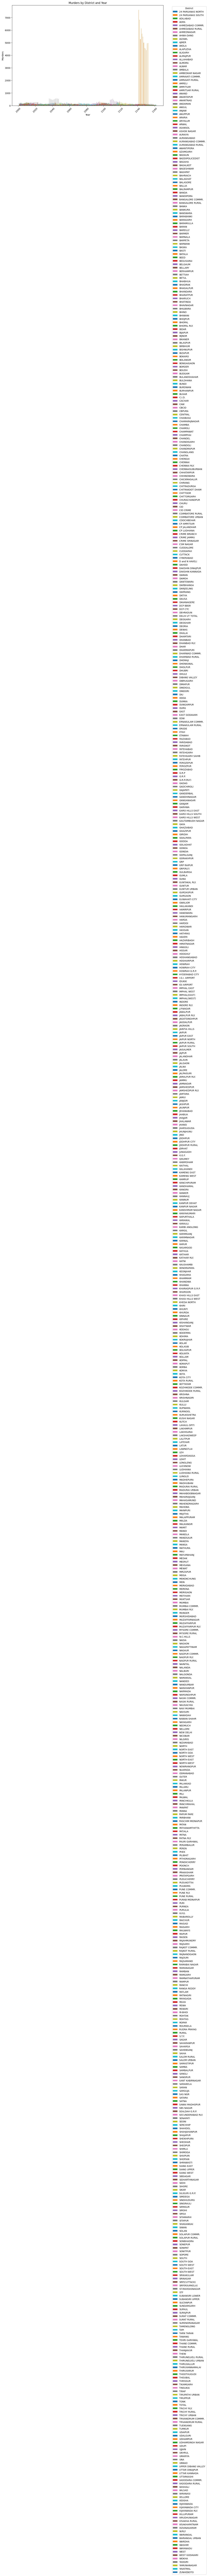

In [66]:
plt.figure(figsize=(12, 8))
for i, (district, data) in enumerate(result.groupby('DISTRICT')):
    plt.bar(data['YEAR'] + i*0.2, data['MURDERS'], width=0.2, label=district)

plt.title('Murders by District and Year')
plt.xlabel('Year')
plt.ylabel('Murders')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Phase 4

### REQ 4.1

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the crime data into a DataFrame
crime_data = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")

label_encoder = LabelEncoder()

crime_data['STATE/UT'] = label_encoder.fit_transform(crime_data['STATE/UT'])

crime_data['DISTRICT'] = label_encoder.fit_transform(crime_data['DISTRICT'])

features = ['STATE/UT', 'DISTRICT']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(crime_data[features])

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

crime_data['Cluster'] = kmeans.labels_

cluster_names = {
    0: 'Sensitive Area',
    1: 'Moderate Area',
    2: 'Peaceful Area'
}

crime_data['Cluster Name'] = crime_data['Cluster'].map(cluster_names)

print(crime_data[['STATE/UT', 'DISTRICT', 'YEAR', 'Cluster Name']])

      STATE/UT  DISTRICT  YEAR    Cluster Name
0            1         3  2001   Peaceful Area
1            1        28  2001   Peaceful Area
2            1       154  2001   Peaceful Area
3            1       172  2001   Peaceful Area
4            1       220  2001   Peaceful Area
...        ...       ...   ...             ...
9012        18       453  2012  Sensitive Area
9013        18       753  2012  Sensitive Area
9014        26       382  2012   Moderate Area
9015        26       589  2012  Sensitive Area
9016        26       753  2012  Sensitive Area

[9017 rows x 4 columns]


### REQ 4.2

In [73]:
cluster_data = {}
for cluster_label, cluster_name in cluster_names.items():
    cluster_data[cluster_name] = crime_data[crime_data['Cluster Name'] == cluster_name].copy()

for cluster_name, df in cluster_data.items():
    print(f"Cluster: {cluster_name}")
    print(df.head())
    print()

Cluster: Sensitive Area
     STATE/UT  DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
189        12       805  2001      42                 14   
203        13       770  2001       6                  6   
204        13       753  2001     119                 75   
226        14       713  2001      63                 49   
227        14       764  2001      21                 28   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
189                                          2    22               0   
203                                          1     9               0   
204                                         11   124               0   
226                                          8     8               0   
227                                          1    10               0   

     OTHER RAPE  KIDNAPPING & ABDUCTION  ...  DOWRY DEATHS  \
189          22                      26  ...             9   
203           9                       5  ...             0

### REQ 4.3

#### Crime Analysis Report

This report presents an analysis of crime data segmented into three clusters: Sensitive Areas, Moderate Areas, and Peaceful Areas. The analysis aims to provide insights into the distribution and characteristics of crime across different regions.

Sensitive areas exhibit the highest levels of crime across various categories.
The number of murders, attempts to murder, and rapes is notably higher in these areas compared to other clusters.
Other IPC crimes and total IPC crimes are also significantly elevated, indicating a high prevalence of criminal activities.
Factors contributing to higher crime rates in sensitive areas may include socioeconomic challenges, inadequate law enforcement, social instability, and the presence of organized crime.

Moderate areas demonstrate intermediate levels of crime compared to sensitive and peaceful areas.
While the number of murders, attempts to murder, and rapes is lower than in sensitive areas, it is higher than in peaceful areas.
Other IPC crimes and total IPC crimes are also moderate in these regions, reflecting a mixed level of criminal activity.

Peaceful areas represent regions with the lowest levels of crime among the three clusters.
The number of murders, attempts to murder, and rapes is the lowest in peaceful areas compared to other clusters.
Other IPC crimes and total IPC crimes are also relatively low, indicating a safer environment compared to sensitive and moderate areas.

The factors Impacting Crime in Sensitive Areas are socioeconomic factors such as poverty, unemployment, and inequality contribute to higher crime rates.
Inadequate law enforcement presence and social instability exacerbate the prevalence of criminal activities.
The influence of organized crime and limited access to education and healthcare also play significant roles in perpetuating crime in sensitive areas.

The best way to deal with these types of crimes can be implementing targeted interventions such as community policing and social welfare programs to address underlying socioeconomic challenges.
Strengthening law enforcement measures and improving police-community relations to enhance public safety and reduce criminal activities.
Foster social cohesion and address root causes of social instability through dialogue, conflict resolution mechanisms, and community engagement initiatives.
Invest in education and healthcare infrastructure to improve access and address disparities, thereby promoting long-term crime prevention efforts.

##### Conclusion:
The analysis underscores the importance of understanding the nuanced dynamics of crime across different regions and the need for tailored strategies to address crime effectively. By addressing underlying socioeconomic factors and strengthening law enforcement and social cohesion, it is possible to create safer and more resilient communities for all residents.

### REQ 4.4

 ### Capstone project overall story 

India, with its diverse population and myriad socio-economic factors, presents a fascinating landscape for crime analysis. Our research aims to shed light on the underlying dynamics, drawing insights from available data sources.
We meticulously collected data on population, literacy rates, and state areas. The literacy rate, a crucial indicator of education and awareness, showed a steady rise over the years. States like Kerala and Mizoram led the literacy charge, while Bihar and Rajasthan struggled to keep pace.


The First phase of the project dealt with collection of data, raw data for the analysis, because of lack of data, we had to take the growth rates published by renowned sources and then equally distributed to mimic the growth, it showed that the literacy rate has been on a constant rise along with the population, the literacy rate on the year 2012 was 69.3%. We calculated area of each state as well. we found:
#### Literacy vs. Total Crimes: States with higher literacy rates tended to have lower overall crime rates. Education, it seems, acts as a deterrent.
#### Year-on-Year Trends: Crime rates increased steadily, raising concerns. We recommend targeted interventions to curb this trend.
#### Area and Crime: Smaller states witnessed fewer crimes, perhaps due to better law enforcement efficiency.

The Second phase dealt with analysis of data where we analysed different factors, starting with literacy and overall crime , which portrayed an inverse relationship suggesting that lower level of literacy gave birth to more crimes. Then we analysed year after year, area vs overall crime and how each state differed in crimes.. we discovered that crime had increased year after year and that smaller the area lower the crime.

The Third phase demanded sql operations to insert record from different datasets and analysis on them, we used different sql commands to manipulate different columns and to find out different levels The first phase of the project dealt with collection of data, raw data for the analysis, because of lack of data, we had to take the growth rates published by renowned sources and then equally distributed to mimic the growth, it showed that the literacy rate has been on a constant rise along with the population, the literacy rate on the year 2012 was 69.3%. We calculated area of each state as well and compared it with overall crime. We imported other files and analysed it.
#### Crimes Against Women
We inserted records from the “Crimes Committed Against Women” dataset. Our queries unveiled both distressing and hopeful trends:
#### Highest Rapes & Kidnappings: Uttar Pradesh consistently topped the charts, demanding urgent attention.
#### Lowest Incidences: Sikkim and Nagaland emerged as safer havens.


#### Crimes Against Scheduled Tribes
Our analysis highlighted pockets of vulnerability:
#### Dacoities and Robberies: Chhattisgarh faced the highest dacoity rates, necessitating targeted policing.
#### Murders: Manipur and Nagaland grappled with violence, demanding community engagement.


The Fourth phase of the project dealt with unsupervised machine learning, or clustering in machine learning, We applied K-Means clustering to group districts, which uses nearby data and calculates its mean and then again groups with nearby data. Clustering gave us an idea on the Sensetive, Moderate or Peaceful areas by the number of crimes. We transfered it into a dataframe and created a conclusion of the data. we found out: 
#### Sensitive Areas: High crime rates, often urban centers.
#### Moderate Areas: Balanced crime rates, reflecting mixed socio-economic conditions.
#### Peaceful Areas: Rural districts with low crime incidence.

